# خوارزمية Naive Bayes

تصنيف المبيعات باستخدام خوارزمية Naive Bayes

## استيراد المكتبات المطلوبة

In [3]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# تعيين نمط seaborn
sns.set_style('whitegrid')
# تعيين حجم الرسومات
plt.rcParams['figure.figsize'] = (12, 8)

## تحميل البيانات المعالجة

In [4]:
# تحميل البيانات المعالجة
df = pd.read_csv('../data/processed/sales_data_processed_20250122_052318.csv')
df.head()

,Order_Date,Category,Region,Segment,Sales,Quantity,Discount,Profit,Year,Month,Quarter,Sales_Category
0,2020-01-01,Technology,South,Consumer,366.800399,6,0.284533,9.524490,2020,1,1,Low
1,2020-01-02,Furniture,South,Home Office,556.867561,6,0.191294,37.407146,2020,1,1,Medium
2,2020-01-03,Technology,West,Home Office,212.152047,1,0.162915,125.708433,2020,1,1,Low
3,2020-01-04,Technology,East,Consumer,687.228360,5,0.118807,137.810135,2020,1,1,High
4,2020-01-05,Furniture,East,Home Office,147.447790,6,0.267729,-30.090084,2020,1,1,Low


## تحضير البيانات للتدريب

In [5]:
# تشفير المتغيرات الفئوية
le = LabelEncoder()
categorical_cols = ['Category', 'Region', 'Segment']
for col in categorical_cols:
    df[f'{col}_Encoded'] = le.fit_transform(df[col])

# تطبيع المتغيرات العددية
scaler = StandardScaler()
numeric_cols = ['Quantity', 'Discount']
for col in numeric_cols:
    df[f'{col}_Scaled'] = scaler.fit_transform(df[[col]])

In [6]:
# تحديد المتغيرات المستقلة والتابع
features = ['Year', 'Month', 'Quarter', 'Quantity_Scaled', 'Discount_Scaled',
            'Category_Encoded', 'Region_Encoded', 'Segment_Encoded']

X = df[features]
y = df['Sales_Category']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## تدريب النموذج

In [7]:
# إنشاء وتدريب النموذج
nb = GaussianNB()
nb.fit(X_train, y_train)

# حساب الدقة
train_accuracy = nb.score(X_train, y_train)
test_accuracy = nb.score(X_test, y_test)

print(f'دقة التدريب: {train_accuracy:.2f}')
print(f'دقة الاختبار: {test_accuracy:.2f}')

دقة التدريب: 0.37
دقة الاختبار: 0.30


## تقييم النموذج

In [8]:
# التنبؤ على بيانات الاختبار
y_pred = nb.predict(X_test)

# عرض تقرير التصنيف
print('تقرير التصنيف:')
print(classification_report(y_test, y_pred))

تقرير التصنيف:
              precision    recall  f1-score   support

        High       0.32      0.42      0.36       190
         Low       0.30      0.15      0.20       215
      Medium       0.27      0.34      0.30       195

    accuracy                           0.30       600
   macro avg       0.30      0.30      0.29       600
weighted avg       0.30      0.30      0.29       600



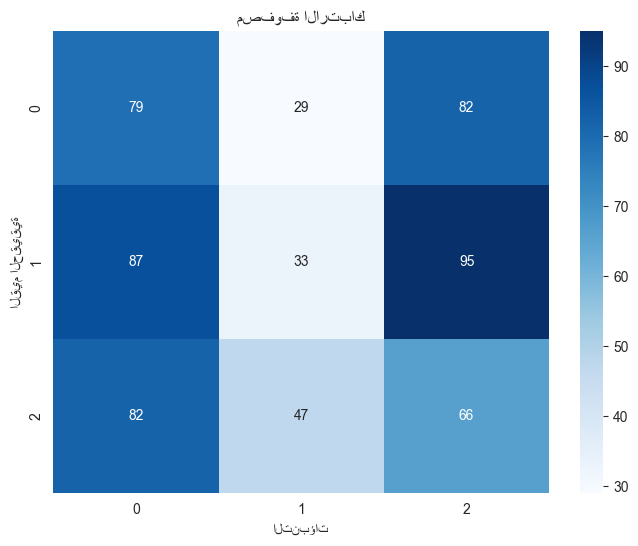

In [9]:
# رسم مصفوفة الارتباك
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('مصفوفة الارتباك')
plt.xlabel('التنبؤات')
plt.ylabel('القيم الحقيقية')
plt.show()

## تحليل الاحتمالات

d:\python\data_mining_project\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\python\data_mining_project\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\python\data_mining_project\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\python\data_mining_project\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

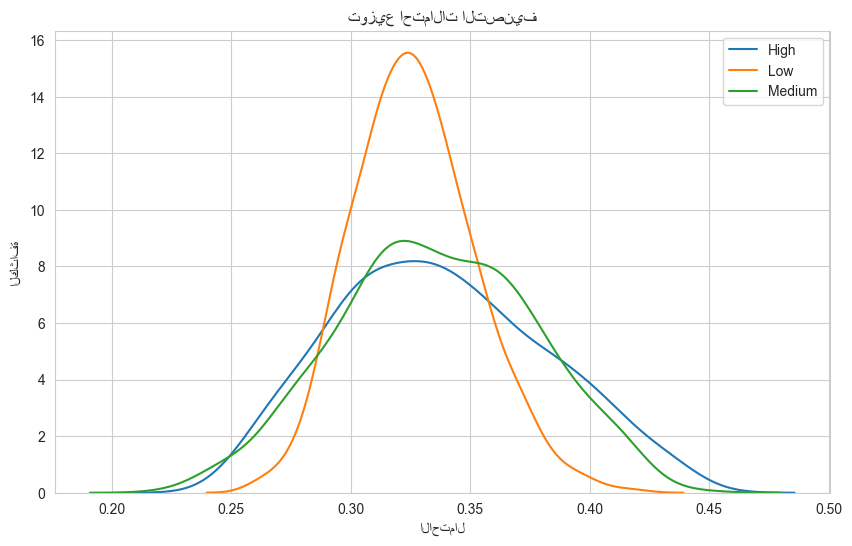

In [10]:
# حساب احتمالات التصنيف
probabilities = nb.predict_proba(X_test)

# رسم توزيع الاحتمالات
plt.figure(figsize=(10, 6))
for i, class_name in enumerate(nb.classes_):
    sns.kdeplot(probabilities[:, i], label=class_name)
plt.title('توزيع احتمالات التصنيف')
plt.xlabel('الاحتمال')
plt.ylabel('الكثافة')
plt.legend()
plt.show()

## تحليل الأخطاء

In [11]:
# تحديد الحالات التي تم تصنيفها بشكل خاطئ
misclassified = X_test[y_test != y_pred].copy()
misclassified['Actual'] = y_test[y_test != y_pred]
misclassified['Predicted'] = y_pred[y_test != y_pred]

print('عدد الحالات المصنفة بشكل خاطئ:', len(misclassified))
print('\nعينة من الحالات المصنفة بشكل خاطئ:')
misclassified.head()

عدد الحالات المصنفة بشكل خاطئ: 422

عينة من الحالات المصنفة بشكل خاطئ:


,Year,Month,Quarter,Quantity_Scaled,Discount_Scaled,Category_Encoded,Region_Encoded,Segment_Encoded,Actual,Predicted
1801,2024,12,4,1.164472,1.215701,1,0,1,Low,High
1190,2023,4,2,-1.579151,0.232053,0,1,2,Low,Medium
1817,2024,12,4,1.164472,0.246455,2,0,0,Low,High
251,2020,9,3,1.164472,1.606595,2,1,1,High,Low
1411,2023,11,4,-0.403313,0.432553,1,0,2,Medium,High
